# Day 17 notebook

The objectives of this notebook are to practice using a Markov chain to

* simulate sequences
* calculate the (log) probability of a sequence
* discriminate between classes of sequences 

In [1]:
# Modules used in this activity
import random  # used by sample_categorical
import math    # for log
from matplotlib import pyplot as plt # for plotting

## A `MarkovChain` class
In this activity we will implement a Markov chain model as a class.  You will be implementing two methods of this class, one to simulate sequences from the Markov chain, and another that computes the probability of a sequence given the Markov chain.

We will be representing each state by a single character and a Markov chain sequence as a string of state characters.  This will make it easy to work with Markov chains of biological sequences such as DNA.  However, to make the computations easier, the transition probability matrix and initial probabilities will be indexed by integers corresponding to the indices of the characters within the state string of the model.  Methods are provided that convert from a string of state characters to a list of state indices and vice versa, for your convenience.

Provided are parameters for the CpG and null DNA models described in the lecture/textbook, which are then used to construct instances of the MarkovChain class.

In [2]:
class MarkovChain:
    def __init__(self, states, transition_prob_matrix, initial_probs):
        """Initializes a MarkovChain
        
        Args:
            states: a string giving the characters representing the states of the model (1 character per state)
            transition_prob_matrix: a list of lists of probabilities representing a transition probability matrix.
                transition_prob_matrix[s][t] should equal P(X_i = t | X_{i-1} = s)
                Row s is thus the conditional probability distribution P(X_i | X_{i-1} = s)
                The indices in this matrix correspond to the indices of the states in the states argument
            initial_probs: a list of probabilities representing the initial state probabilities.
                Entry t of this list is P(X_1 = s), i.e., the probability that the first state in the chain is t.
                The indices of this list correspond to the indices of the states in the states argument.
        """
        self.states = states
        self.transition_prob_matrix = transition_prob_matrix
        self.initial_probs = initial_probs
    
    def encode(self, sequence):
        """Encodes a string of state characters as a list of indices of the states."""
        return [self.states.index(char) for char in sequence]

    def decode(self, indices):
        """Decodes a sequence of state indices into a string of the state characters."""
        return "".join(self.states[index] for index in indices)
    
    def simulate(self, length):
        """Simulates a sequence of the given length from this Markov chain"""
        ### BEGIN SOLUTION
        indices = [None] * length
        if length > 0:
            indices[0] = sample_categorical(self.initial_probs)
        for i in range(1, length):
            indices[i] = sample_categorical(self.transition_prob_matrix[indices[i - 1]])
        return self.decode(indices)
        ### END SOLUTION
        
    def sequence_log_probability(self, sequence):
        """Calculates the (natural) log probability (log(P(sequence))) of a sequence given this Markov chain"""
        ### BEGIN SOLUTION
        probs = [None] * len(sequence)
        encoded_sequence = self.encode(sequence)
        if encoded_sequence:
            probs[0] = initial_probs[encoded_sequence[0]]
            for i in range(1, len(encoded_sequence)):
                probs[i] = self.transition_prob_matrix[encoded_sequence[i - 1]][encoded_sequence[i]]
        return sum(map(math.log, probs))
        ### END SOLUTION


# Using the class above, we construct two Markov chain models corresponding to the CpG and null
# DNA models described in the lecture and textbook
dna_chain_states = "ACGT"
initial_probs = [0.25, 0.25, 0.25, 0.25]
cpg_transition_prob_matrix = [
    [0.18, 0.27, 0.43, 0.12],
    [0.17, 0.37, 0.27, 0.19],
    [0.16, 0.34, 0.38, 0.12],
    [0.08, 0.36, 0.38, 0.18]
]
null_transition_prob_matrix = [
    [0.30, 0.21, 0.28, 0.21],
    [0.32, 0.30, 0.08, 0.30],
    [0.25, 0.24, 0.30, 0.21],
    [0.18, 0.24, 0.29, 0.29]
]
cpg_chain = MarkovChain(dna_chain_states, cpg_transition_prob_matrix, initial_probs)
null_chain = MarkovChain(dna_chain_states, null_transition_prob_matrix, initial_probs)

Below is a function that you will need to use in implementing the `simulate` method.

In [3]:
def sample_categorical(distribution):
    """Randomly sample from a categorical distribution (a discrete distribution over K categories).
    
    Args:
        distribution: a list of probabilities representing a discrete distribution over K categories.
    Returns:
        The index of the category sampled.
    """
    r = random.random()
    for i, prob in enumerate(distribution):
        if r < prob:
            return i
        else:
            r -= prob
    # in case we encounter floating point issues return the last index
    return len(distribution) - 1

In [4]:
# example of taking 20 draws from the initial probability distribution:
[sample_categorical(initial_probs) for i in range(20)]

[3, 2, 3, 3, 1, 2, 0, 0, 3, 1, 2, 2, 2, 3, 3, 0, 2, 1, 1, 2]

## PROBLEM 1: Simulate a sequence from a Markov chain (1 POINT)

Implement the `simulate` method of the `MarkovChain` class.  You should call the `sample_categorical` function provided to you above to sample each state of the chain from the appropriate distribution.

In [5]:
# tests for simulate
random.seed(42)
assert cpg_chain.simulate(1) == 'G'
random.seed(42)
assert cpg_chain.simulate(2) == 'GA'
random.seed(42)
assert cpg_chain.simulate(3) == 'GAC'
random.seed(42)
assert cpg_chain.simulate(4) == 'GACC'
random.seed(42)
assert cpg_chain.simulate(10) == 'GACCGGTCCA'
random.seed(42)
assert null_chain.simulate(10) == 'GAAAGGTACA'
print("SUCCESS: simulate passed all tests!")

SUCCESS: simulate passed all tests!


## PROBLEM 2: Calculate the (log) probability of a sequence given a Markov chain (1 POINT)

Implement the `sequence_log_probability` method of the `MarkovChain` class.  To avoid numerical issues, be sure to implement this as a *sum* of *log-transformed* probability parameters from the model.  If you implement this by taking the logarithm of the product of the probabilities, you will run into numerical problems for long sequences.

In [6]:
# tests for sequence_log_probability
assert round(cpg_chain.sequence_log_probability('G'), 2) == -1.39
assert round(cpg_chain.sequence_log_probability('GA'), 2) == -3.22
assert round(cpg_chain.sequence_log_probability('GAC'), 2) == -4.53
assert round(cpg_chain.sequence_log_probability('GACCGGTCCA'), 2) == -13.71
assert round(cpg_chain.sequence_log_probability('A' * 1000), 2) == -1714.47
assert round(null_chain.sequence_log_probability('G'), 2) == -1.39
assert round(null_chain.sequence_log_probability('GA'), 2) == -2.77
assert round(null_chain.sequence_log_probability('GAC'), 2) == -4.33
assert round(null_chain.sequence_log_probability('GACCGGTCCA'), 2) == -14.6
assert round(null_chain.sequence_log_probability('A' * 1000), 2) == -1204.16
print("SUCCESS: sequence_log_probability passed all tests!")

SUCCESS: sequence_log_probability passed all tests!


## PROBLEM 3: Discriminating between sequence classes with Markov chains (1 POINT)

Implement the function `log_ratio_score` below, which computes the log of the ratio of the probability of a sequence given two competing Markov chain models.  This should just be a one-liner.

In [7]:
def log_ratio_score(sequence, model1, model2):
    """Calculates the log odds score of sequence for model1 vs. model2.

    Args:
        sequence: a string representing a sequence that could have been generated from either model
        model1: the first model as a MarkovChain object
        model2: the second model as a MarkovChain object
    Returns:
        log(P(sequence | model1) / P(sequence | model2))
    """
    ### BEGIN SOLUTION
    return model1.sequence_log_probability(sequence) - model2.sequence_log_probability(sequence)
    ### END SOLUTION

In [8]:
# tests for log_ratio_score
assert round(log_ratio_score('G', cpg_chain, null_chain), 2) == 0.0
assert round(log_ratio_score('GA', cpg_chain, null_chain), 2) == -0.45
assert round(log_ratio_score('GAC', cpg_chain, null_chain), 2) == -0.19
assert round(log_ratio_score('GACCGGTCCA', cpg_chain, null_chain), 2) == 0.89
assert round(log_ratio_score('CGACGCGTTT', cpg_chain, null_chain), 2) == 2.29
print("SUCCESS: log_ratio_score passed all tests!")

SUCCESS: log_ratio_score passed all tests!


### Putting it all together: discriminating between CpG and null sequences

Lastly, let's put all of your work together to simulate some sequences from both the CpG and null models, and then score them according to the `log_ratio_score` to see if the simulated sequences are classified correctly by this score.

In [9]:
# simulate sequences from the two classes (CpG and null) and score them
num_sequences_per_class = 1000
sequence_length = 100
null_sequences = [null_chain.simulate(sequence_length) for i in range(num_sequences_per_class)]
cpg_sequences = [cpg_chain.simulate(sequence_length) for i in range(num_sequences_per_class)]
null_sequence_scores = [log_ratio_score(sequence, cpg_chain, null_chain) for sequence in null_sequences]
cpg_sequence_scores = [log_ratio_score(sequence, cpg_chain, null_chain) for sequence in cpg_sequences]

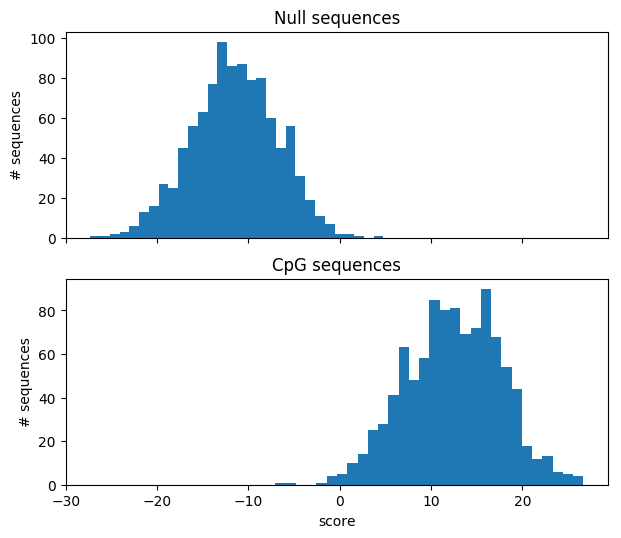

In [10]:
# plot the scores of the two classes of simulated sequences
n_bins = 30
plt.figure(figsize=(7, 6), dpi=100)
ax1 = plt.subplot(2, 1, 1, title="Null sequences")
plt.hist(null_sequence_scores, bins=n_bins)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel("# sequences")
ax2 = plt.subplot(2, 1, 2, sharex=ax1, title="CpG sequences")
plt.xlabel("score")
plt.ylabel("# sequences")
plt.hist(cpg_sequence_scores, bins=n_bins)
plt.show()

Does it look like the log ratio score does a good job at discriminating between simulated CpG and null sequences?

### BEGIN SOLUTION TEMPLATE=Your thoughts here
Yes, it does.  Almost all null sequences have negative scores and almost all CpG sequences have positive scores.  The exceptions would result in a few misclassifications if we used the score to classify sequences, but overall it does very well, which is a reflection of how different the two classes of sequences are.
### END SOLUTION